In [1]:
import sys, os, time, json, pickle
from timeit import default_timer as timer
from humanfriendly import format_timespan
from glob import glob

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
from dotenv import load_dotenv
load_dotenv('admin.env')

True

In [5]:
from mysql_connect import get_db_connection
db = get_db_connection('jp_autoreview')

In [6]:
start = timer()
df = db.read_sql(db.tables['pipeline_tests'].select())
print(format_timespan(timer()-start))

3.48 seconds


In [7]:
df.set_index('id', inplace=True)

In [8]:
top_results = df.sort_values('score_correctly_predicted', ascending=False).drop_duplicates(['review_paper_id', 'random_seed'])

In [9]:
# limit to at least 20 target papers
top_results = top_results[top_results.num_target_papers>=20]

In [10]:
top_results.mean().apply(lambda x: format(x, 'f'))

review_paper_id              2098909654.929733
random_seed                           2.998773
num_correctly_predicted             242.833998
num_target_papers                   853.112918
num_target_in_candidates            841.709727
num_seed_papers                      50.000000
score_correctly_predicted             0.295800
num_candidates                   551742.496778
time_fit                           1739.139920
time_predict                        793.613071
dtype: object

In [11]:
top_results.score_correctly_predicted.describe()

count    3259.000000
mean        0.295800
std         0.109889
min         0.004098
25%         0.218888
50%         0.297101
75%         0.364045
max         0.759615
Name: score_correctly_predicted, dtype: float64

In [12]:
top_results[top_results.num_target_papers>=20]['score_correctly_predicted'].describe()

count    3259.000000
mean        0.295800
std         0.109889
min         0.004098
25%         0.218888
50%         0.297101
75%         0.364045
max         0.759615
Name: score_correctly_predicted, dtype: float64

In [13]:
top_results[top_results.num_target_papers>=20]['score_correctly_predicted'].describe()

count    3259.000000
mean        0.295800
std         0.109889
min         0.004098
25%         0.218888
50%         0.297101
75%         0.364045
max         0.759615
Name: score_correctly_predicted, dtype: float64

In [14]:
top_results.review_paper_id.nunique()

654

In [31]:
vc = top_results.review_paper_id.value_counts()
less_than_5 = top_results[top_results.review_paper_id.isin(vc[vc<5].index)].sort_values(['review_paper_id', 'random_seed'])
print("There are {} review papers that had less than 5 entries. Excluding these.".format(len(less_than_5)))
top_results = top_results[~top_results.review_paper_id.isin(vc[vc<5].index)]

There are 19 review papers that had less than 5 entries. Excluding these.


In [32]:
top_results.score_correctly_predicted.describe()

count    3240.000000
mean        0.296535
std         0.109497
min         0.004098
25%         0.220227
50%         0.297400
75%         0.364218
max         0.759615
Name: score_correctly_predicted, dtype: float64

In [33]:
top_results.review_paper_id.nunique()

648

In [34]:
top_results[top_results.score_correctly_predicted>.68].sort_values('score_correctly_predicted', ascending=False).drop_duplicates(subset=['review_paper_id'])

,datetime_added,review_paper_id,random_seed,datadir,num_correctly_predicted,num_target_papers,num_target_in_candidates,num_seed_papers,score_correctly_predicted,num_candidates,features,clf,clf_type,time_fit,time_predict,saved_model
id,,,,,,,,,,,,,,,,
90602,2018-07-07 04:42:46,2071171979,5,data/review_2071171979/seed_005,79,104,103,50,0.759615,12698,"['avg_distance_to_train', 'ef', 'avg_title_tfi...","RandomForestClassifier(bootstrap=True, class_w...",RandomForestClassifier,25,15,data/review_2071171979/seed_005/best_model_201...
42194,2018-06-26 23:22:32,783250631,2,data/review_783250631/seed_002,292,413,404,50,0.707022,640600,"['avg_distance_to_train', 'ef', 'avg_title_tfi...","RandomForestClassifier(bootstrap=True, class_w...",RandomForestClassifier,1485,1341,data/review_783250631/seed_002/best_model_2018...
72154,2018-07-03 04:55:32,2026986848,1,data/review_2026986848/seed_001,18,26,24,50,0.692308,427772,"['avg_distance_to_train', 'ef', 'avg_title_tfi...","RandomForestClassifier(bootstrap=True, class_w...",RandomForestClassifier,518,492,None


In [35]:
import seaborn as sns

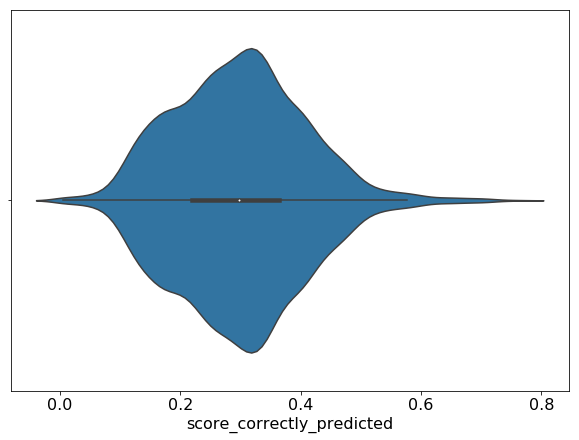

In [54]:
fig, ax = plt.subplots(figsize=(10,7))
sns.violinplot(x=top_results.score_correctly_predicted, ax=ax)
font_size = 16
ax.xaxis.label.set_size(font_size)
ax.tick_params(labelsize=font_size)

In [57]:
#fig.savefig('score_correctly_predicted_violinplot_20190703.png')

In [58]:
top_results[top_results.review_paper_id==2127048411]

,datetime_added,review_paper_id,random_seed,datadir,num_correctly_predicted,num_target_papers,num_target_in_candidates,num_seed_papers,score_correctly_predicted,num_candidates,features,clf,clf_type,time_fit,time_predict,saved_model
id,,,,,,,,,,,,,,,,


In [18]:
top_results[top_results.num_target_papers>=20].sort_values('num_target_in_candidates')

,datetime_added,review_paper_id,random_seed,datadir,num_correctly_predicted,num_target_papers,num_target_in_candidates,num_seed_papers,score_correctly_predicted,num_candidates,features,clf,clf_type,time_fit,time_predict,saved_model
id,,,,,,,,,,,,,,,,
102902,2018-07-09 10:16:32,2019639629,4,data/review_2019639629/seed_004,3,732,4,50,0.004098,29811,"['avg_distance_to_train', 'ef', 'avg_title_tfi...","LogisticRegression(C=1.0, class_weight='balanc...",LogisticRegression,16,23,data/review_2019639629/seed_004/best_model_201...
102971,2018-07-09 10:19:07,2019639629,5,data/review_2019639629/seed_005,4,732,5,50,0.005464,25822,"['avg_distance_to_train', 'ef', 'avg_title_tfi...","RandomForestClassifier(bootstrap=True, class_w...",RandomForestClassifier,23,20,None
102858,2018-07-09 10:06:27,2019639629,1,data/review_2019639629/seed_001,5,732,5,50,0.006831,34589,"['avg_distance_to_train', 'ef', 'avg_title_tfi...","RandomForestClassifier(bootstrap=True, class_w...",RandomForestClassifier,32,38,None
102979,2018-07-09 10:12:54,2019639629,3,data/review_2019639629/seed_003,5,732,5,50,0.006831,33315,"['avg_distance_to_train', 'ef', 'avg_title_tfi...","AdaBoostClassifier(algorithm='SAMME.R', base_e...",AdaBoostClassifier,50,38,None
102869,2018-07-09 10:09:46,2019639629,2,data/review_2019639629/seed_002,4,732,5,50,0.005464,28043,"['avg_distance_to_train', 'ef', 'avg_title_tfi...","RandomForestClassifier(bootstrap=True, class_w...",RandomForestClassifier,25,23,data/review_2019639629/seed_002/best_model_201...
48507,2018-06-28 19:26:43,2123611509,1,data/review_2123611509/seed_001,3,338,7,50,0.008876,37864,"['avg_distance_to_train', 'ef']","LogisticRegression(C=1.0, class_weight=None, d...",LogisticRegression,35,35,None
48818,2018-06-28 20:25:20,2123611509,3,data/review_2123611509/seed_003,4,338,7,50,0.011834,84640,"['avg_distance_to_train', 'ef']","AdaBoostClassifier(algorithm='SAMME.R', base_e...",AdaBoostClassifier,125,107,data/review_2123611509/seed_003/best_model_201...
48831,2018-06-28 20:57:02,2123611509,4,data/review_2123611509/seed_004,4,338,7,50,0.011834,102819,"['avg_distance_to_train', 'ef']","LogisticRegression(C=1.0, class_weight=None, d...",LogisticRegression,73,84,data/review_2123611509/seed_004/best_model_201...
49018,2018-06-28 21:11:27,2123611509,5,data/review_2123611509/seed_005,5,338,8,50,0.014793,203585,"['avg_distance_to_train', 'ef']","RandomForestClassifier(bootstrap=True, class_w...",RandomForestClassifier,260,200,None


In [19]:
top_model_top_results = top_results.sort_values('score_correctly_predicted', ascending=False).drop_duplicates(['review_paper_id'])
top_model_top_results[top_model_top_results.num_target_papers>=20]['score_correctly_predicted'].describe()

count    654.000000
mean       0.318210
std        0.110327
min        0.006831
25%        0.243078
50%        0.320974
75%        0.388852
max        0.759615
Name: score_correctly_predicted, dtype: float64

In [20]:
top_results.review_paper_id.nunique()

654

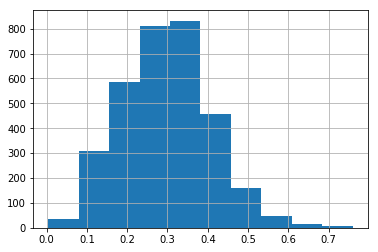

In [21]:
top_results.score_correctly_predicted.hist()

In [22]:
def get_paper_info(datadir):
    g = glob(os.path.join(datadir, '..', '*paperinfo.json'))
    if len(g) != 1:
        raise RuntimeError("failed to find paper info")
    return pd.read_json(os.path.join(g[0]), typ='series')

In [23]:
start = timer()
data = []
for id, row in top_results.iterrows():
    this_row_data = get_paper_info(row.datadir)
    this_row_data['id'] = id
    data.append(this_row_data)
paperinfo = pd.DataFrame(data).set_index('id')
print(format_timespan(timer()-start))

17.72 seconds


In [24]:
row

datetime_added                                             2018-07-09 10:16:32
review_paper_id                                                     2019639629
random_seed                                                                  4
datadir                                        data/review_2019639629/seed_004
num_correctly_predicted                                                      3
num_target_papers                                                          732
num_target_in_candidates                                                     4
num_seed_papers                                                             50
score_correctly_predicted                                           0.00409836
num_candidates                                                           29811
features                     ['avg_distance_to_train', 'ef', 'avg_title_tfi...
clf                          LogisticRegression(C=1.0, class_weight='balanc...
clf_type                                            

In [25]:
top_results = top_results.join(paperinfo[['wos_title', 'mag_EF', 'doi', 'wos_title_source']])

In [26]:
top_results.drop_duplicates('review_paper_id')

,datetime_added,review_paper_id,random_seed,datadir,num_correctly_predicted,num_target_papers,num_target_in_candidates,num_seed_papers,score_correctly_predicted,num_candidates,features,clf,clf_type,time_fit,time_predict,saved_model,wos_title,mag_EF,doi,wos_title_source
id,,,,,,,,,,,,,,,,,,,,
90602,2018-07-07 04:42:46,2071171979,5,data/review_2071171979/seed_005,79,104,103,50,0.759615,12698,"['avg_distance_to_train', 'ef', 'avg_title_tfi...","RandomForestClassifier(bootstrap=True, class_w...",RandomForestClassifier,25,15,data/review_2071171979/seed_005/best_model_201...,Wing-in-ground effect vehicles,6.930000e-08,10.1016/j.paerosci.2006.10.001,PROGRESS IN AEROSPACE SCIENCES
42194,2018-06-26 23:22:32,783250631,2,data/review_783250631/seed_002,292,413,404,50,0.707022,640600,"['avg_distance_to_train', 'ef', 'avg_title_tfi...","RandomForestClassifier(bootstrap=True, class_w...",RandomForestClassifier,1485,1341,data/review_783250631/seed_002/best_model_2018...,A Coffee Berry Borer (Coleoptera: Curculionida...,5.800000e-09,10.1093/jisesa/iev053,JOURNAL OF INSECT SCIENCE
72154,2018-07-03 04:55:32,2026986848,1,data/review_2026986848/seed_001,18,26,24,50,0.692308,427772,"['avg_distance_to_train', 'ef', 'avg_title_tfi...","RandomForestClassifier(bootstrap=True, class_w...",RandomForestClassifier,518,492,None,Dye-Sensitized Solar Cells,1.069500e-06,10.1021/cr900356p,CHEMICAL REVIEWS
44031,2018-06-27 19:10:58,2031246464,3,data/review_2031246464/seed_003,841,1273,1256,50,0.660644,123828,"['avg_distance_to_train', 'ef', 'avg_title_tfi...","RandomForestClassifier(bootstrap=True, class_w...",RandomForestClassifier,372,231,data/review_2031246464/seed_003/best_model_201...,Molecular imprinting science and technology: a...,1.568000e-07,10.1002/jmr.760,JOURNAL OF MOLECULAR RECOGNITION
48887,2018-06-28 04:07:17,2156979070,4,data/review_2156979070/seed_004,880,1335,1328,50,0.659176,627188,"['avg_distance_to_train', 'ef', 'avg_title_tfi...","RandomForestClassifier(bootstrap=True, class_w...",RandomForestClassifier,2241,1055,data/review_2156979070/seed_004/best_model_201...,Pituitary Adenylate Cyclase-Activating Polypep...,6.520000e-08,10.1124/pr.109.001370,PHARMACOLOGICAL REVIEWS
64366,2018-07-01 20:59:23,2513883627,5,data/review_2513883627/seed_005,409,653,649,50,0.626340,102376,"['avg_distance_to_train', 'ef', 'avg_title_tfi...","RandomForestClassifier(bootstrap=True, class_w...",RandomForestClassifier,131,120,data/review_2513883627/seed_005/best_model_201...,Which method is best for the induction of labo...,7.300000e-09,10.3310/hta20650,HEALTH TECHNOLOGY ASSESSMENT
62011,2018-07-01 10:34:47,2334595206,1,data/review_2334595206/seed_001,413,681,677,50,0.606461,157684,"['avg_distance_to_train', 'ef', 'avg_title_tfi...","RandomForestClassifier(bootstrap=True, class_w...",RandomForestClassifier,466,295,data/review_2334595206/seed_001/best_model_201...,Meliaceous Limonoids: Chemistry and Biological...,5.310000e-08,10.1021/cr9004023,CHEMICAL REVIEWS
91096,2018-07-07 01:31:13,2087588672,5,data/review_2087588672/seed_005,419,697,693,50,0.601148,444287,"['avg_distance_to_train', 'ef', 'avg_title_tfi...","RandomForestClassifier(bootstrap=True, class_w...",RandomForestClassifier,622,541,data/review_2087588672/seed_005/best_model_201...,Structure and function of the vomeronasal syst...,7.820000e-08,10.1016/S0301-0082(03)00103-5,PROGRESS IN NEUROBIOLOGY
50641,2018-06-29 04:52:11,1995191254,4,data/review_1995191254/seed_004,593,989,986,50,0.599596,94604,"['avg_distance_to_train', 'ef', 'avg_title_tfi...","RandomForestClassifier(bootstrap=True, class_w...",RandomForestClassifier,324,142,data/review_1995191254/seed_004/best_model_201...,Surface chemistry of atomic layer deposition: ...,4.328000e-07,10.1063/1.1940727,JOURNAL OF APPLIED PHYSICS


In [27]:
wos_source = pd.read_table('data/wos_title_sources_subjects.tsv')

/home/jporteno/code/autoreview/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.


In [28]:
gb = wos_source.groupby('title_source')
wos_source['num_entries'] = wos_source.title_source.map(gb.title_source.count())

In [29]:
wos_source.sort_values(['num_entries', 'title_source'], ascending=[False, True])

,title_source,title_source_abbrev,subject_extended,subject_traditional,heading,subheading,num_entries
23655,ARTIFICIAL INTELLIGENCE IN EDUCATION,FR ART INT,Computer Science,"Computer Science, Artificial Intelligence; Com...",Science & Technology,Technology,9.0
23656,ARTIFICIAL INTELLIGENCE IN EDUCATION,FR ART INT,Computer Science,"Computer Science, Artificial Intelligence; Com...",Science & Technology,Technology,9.0
23657,ARTIFICIAL INTELLIGENCE IN EDUCATION,FR ART INT,Computer Science; Education & Educational Rese...,"Computer Science, Artificial Intelligence; Com...",Science & Technology,Technology,9.0
23658,ARTIFICIAL INTELLIGENCE IN EDUCATION,FR ART INT,Computer Science; Education & Educational Rese...,"Computer Science, Artificial Intelligence; Com...",Science & Technology,Technology,9.0
23659,ARTIFICIAL INTELLIGENCE IN EDUCATION,FRONT ARTIF INTEL AP,Computer Science,"Computer Science, Artificial Intelligence; Com...",Science & Technology,Technology,9.0
23660,ARTIFICIAL INTELLIGENCE IN EDUCATION,FRONT ARTIF INTEL AP,Computer Science,"Computer Science, Artificial Intelligence; Com...",Science & Technology,Technology,9.0
23661,ARTIFICIAL INTELLIGENCE IN EDUCATION,FRONT ARTIF INTEL AP,Computer Science; Education & Educational Rese...,"Computer Science, Artificial Intelligence; Com...",Science & Technology,Technology,9.0
23662,ARTIFICIAL INTELLIGENCE IN EDUCATION,FRONT ARTIF INTEL AP,Computer Science; Education & Educational Rese...,"Computer Science, Artificial Intelligence; Com...",Science & Technology,Technology,9.0
23663,ARTIFICIAL INTELLIGENCE IN EDUCATION,LECT NOTES ARTIF INT,Computer Science,"Computer Science, Artificial Intelligence; Com...",Science & Technology,Technology,9.0
73902,HIGH PERFORMANCE COMPUTING SYSTEMS AND APPLICA...,NaN,Computer Science,"Computer Science, Interdisciplinary Applicatio...",Science & Technology,Technology,9.0


In [30]:
wos_source.nunique()

title_source           164411
title_source_abbrev     31732
subject_extended        11638
subject_traditional     20956
heading                     3
subheading                  3
num_entries                 9
dtype: int64

In [31]:
wos_source[['title_source', 'heading', 'subheading', 'num_entries']].drop_duplicates()

,title_source,heading,subheading,num_entries
0,NaN,NaN,NaN,NaN
1,'92 ELECTROWEAK INTERACTIONS AND UNIFIED THEORIES,Science & Technology,Physical Sciences,1.0
2,'93 ELECTROWEAK INTERACTIONS AND UNIFIED THEORIES,Science & Technology,Physical Sciences,1.0
3,'94 ELECTROWEAK INTERACTIONS AND UNIFIED THEORIES,Science & Technology,Physical Sciences,1.0
4,'95 ELECTROWEAK INTERACTIONS AND UNIFIED THEORIES,Science & Technology,Physical Sciences,1.0
5,'95 QCD AND HIGH ENERGY HADRONIC INTERACTIONS,Science & Technology,Physical Sciences,1.0
6,"'96 CHINA-JAPAN SYMPOSIUM ON PARTICUOLOGY, PRO...",Science & Technology,Technology,1.0
7,'97 NANJING INTERNATIONAL SYMPOSIUM ON HIGH YI...,Science & Technology,Technology,1.0
8,'99 INTERNATIONAL CONFERENCE ON MANAGEMENT SCI...,Science & Technology,Technology,1.0
9,'ABBASID STUDIES,Arts & Humanities,NaN,1.0


In [32]:
top_results = top_results.merge(wos_source.drop_duplicates(subset=['title_source']), how='left', left_on='wos_title_source', right_on='title_source')

In [33]:
x = top_results.drop_duplicates('review_paper_id').dropna(subset=['heading']).reset_index()
x[x.heading=="Science & Technology"]

,index,datetime_added,review_paper_id,random_seed,datadir,num_correctly_predicted,num_target_papers,num_target_in_candidates,num_seed_papers,score_correctly_predicted,...,mag_EF,doi,wos_title_source,title_source,title_source_abbrev,subject_extended,subject_traditional,heading,subheading,num_entries
0,0,2018-07-07 04:42:46,2071171979,5,data/review_2071171979/seed_005,79,104,103,50,0.759615,...,6.930000e-08,10.1016/j.paerosci.2006.10.001,PROGRESS IN AEROSPACE SCIENCES,PROGRESS IN AEROSPACE SCIENCES,PROG AEROSP SCI,Engineering,"Engineering, Aerospace",Science & Technology,Technology,1.0
1,3,2018-06-26 23:22:32,783250631,2,data/review_783250631/seed_002,292,413,404,50,0.707022,...,5.800000e-09,10.1093/jisesa/iev053,JOURNAL OF INSECT SCIENCE,JOURNAL OF INSECT SCIENCE,J INSECT SCI,Entomology,Entomology,Science & Technology,Life Sciences & Biomedicine,1.0
2,7,2018-07-03 04:55:32,2026986848,1,data/review_2026986848/seed_001,18,26,24,50,0.692308,...,1.069500e-06,10.1021/cr900356p,CHEMICAL REVIEWS,CHEMICAL REVIEWS,CHEM REV,Chemistry,"Chemistry, Multidisciplinary",Science & Technology,Physical Sciences,1.0
3,11,2018-06-27 19:10:58,2031246464,3,data/review_2031246464/seed_003,841,1273,1256,50,0.660644,...,1.568000e-07,10.1002/jmr.760,JOURNAL OF MOLECULAR RECOGNITION,JOURNAL OF MOLECULAR RECOGNITION,J MOL RECOGNIT,Biochemistry & Molecular Biology; Biophysics,Biochemistry & Molecular Biology; Biophysics,Science & Technology,Life Sciences & Biomedicine,1.0
4,12,2018-06-28 04:07:17,2156979070,4,data/review_2156979070/seed_004,880,1335,1328,50,0.659176,...,6.520000e-08,10.1124/pr.109.001370,PHARMACOLOGICAL REVIEWS,PHARMACOLOGICAL REVIEWS,PHARMACOL REV,Pharmacology & Pharmacy,Pharmacology & Pharmacy,Science & Technology,Life Sciences & Biomedicine,1.0
5,21,2018-07-01 20:59:23,2513883627,5,data/review_2513883627/seed_005,409,653,649,50,0.626340,...,7.300000e-09,10.3310/hta20650,HEALTH TECHNOLOGY ASSESSMENT,HEALTH TECHNOLOGY ASSESSMENT,HEALTH TECHNOL ASSES,Health Care Sciences & Services,Health Care Sciences & Services,Science & Technology,Life Sciences & Biomedicine,1.0
6,23,2018-07-01 10:34:47,2334595206,1,data/review_2334595206/seed_001,413,681,677,50,0.606461,...,5.310000e-08,10.1021/cr9004023,CHEMICAL REVIEWS,CHEMICAL REVIEWS,CHEM REV,Chemistry,"Chemistry, Multidisciplinary",Science & Technology,Physical Sciences,1.0
7,25,2018-07-07 01:31:13,2087588672,5,data/review_2087588672/seed_005,419,697,693,50,0.601148,...,7.820000e-08,10.1016/S0301-0082(03)00103-5,PROGRESS IN NEUROBIOLOGY,PROGRESS IN NEUROBIOLOGY,PROG NEUROBIOL,Neurosciences & Neurology,Neurosciences,Science & Technology,Life Sciences & Biomedicine,1.0
8,26,2018-06-29 04:52:11,1995191254,4,data/review_1995191254/seed_004,593,989,986,50,0.599596,...,4.328000e-07,10.1063/1.1940727,JOURNAL OF APPLIED PHYSICS,JOURNAL OF APPLIED PHYSICS,J APPL PHYS,Physics,"Physics, Applied",Science & Technology,Physical Sciences,1.0
9,29,2018-07-02 02:27:39,2321077391,3,data/review_2321077391/seed_003,498,832,832,50,0.598558,...,6.590000e-08,10.1021/cr500249p,CHEMICAL REVIEWS,CHEMICAL REVIEWS,CHEM REV,Chemistry,"Chemistry, Multidisciplinary",Science & Technology,Physical Sciences,1.0


In [34]:
x = top_results.drop_duplicates('review_paper_id')
x[x.heading.isna()]

,datetime_added,review_paper_id,random_seed,datadir,num_correctly_predicted,num_target_papers,num_target_in_candidates,num_seed_papers,score_correctly_predicted,num_candidates,...,mag_EF,doi,wos_title_source,title_source,title_source_abbrev,subject_extended,subject_traditional,heading,subheading,num_entries
293,2018-07-08 12:28:04,1973613674,5,data/review_1973613674/seed_005,292,661,660,50,0.441755,232032,...,1.280000e-08,10.1167/11.5.11,JOURNAL OF VISION,JOURNAL OF VISION,J VISION,NaN,NaN,NaN,NaN,2.0
1001,2018-07-09 10:33:56,2103258766,2,data/review_2103258766/seed_002,244,706,693,50,0.345609,152346,...,1.123000e-07,10.1136/thx.2008.101691,THORAX,THORAX,THORAX,NaN,NaN,NaN,NaN,2.0
1041,2018-07-04 16:16:57,2109712401,3,data/review_2109712401/seed_003,275,803,799,50,0.342466,729380,...,1.185200e-06,10.1161/CIRCULATIONAHA.109.192065,CIRCULATION,CIRCULATION,CIRCULATION,NaN,NaN,NaN,NaN,2.0
1087,2018-07-03 14:26:46,1907369419,5,data/review_1907369419/seed_005,258,761,761,50,0.339028,300618,...,1.975000e-07,10.1002/jgrd.50171,JOURNAL OF GEOPHYSICAL RESEARCH-ATMOSPHERES,JOURNAL OF GEOPHYSICAL RESEARCH-ATMOSPHERES,J GEOPHYS RES-ATMOS,NaN,NaN,NaN,NaN,2.0
1167,2018-07-01 04:45:19,2424173776,5,data/review_2424173776/seed_005,313,939,938,50,0.333333,493682,...,9.100000e-09,10.1002/aenm.201502159,ADVANCED ENERGY MATERIALS,ADVANCED ENERGY MATERIALS,ADV ENERGY MATER,NaN,NaN,NaN,NaN,2.0
1185,2018-06-28 00:16:39,2028756415,3,data/review_2028756415/seed_003,466,1404,1402,50,0.331909,591395,...,3.410000e-08,10.1186/1471-244X-14-S1-S1,BMC PSYCHIATRY,BMC PSYCHIATRY,BMC PSYCHIATRY,NaN,NaN,NaN,NaN,2.0
1852,2018-06-28 08:55:15,2214094658,1,data/review_2214094658/seed_001,223,807,801,50,0.276332,379946,...,3.043000e-07,10.1161/CIRCULATIONAHA.105.166550,CIRCULATION,CIRCULATION,CIRCULATION,NaN,NaN,NaN,NaN,2.0
2167,2018-07-11 09:06:22,2562634299,1,data/review_2562634299/seed_001,151,609,608,50,0.247947,804366,...,5.500000e-09,10.1002/2015RG000510,REVIEWS OF GEOPHYSICS,REVIEWS OF GEOPHYSICS,REV GEOPHYS,NaN,NaN,NaN,NaN,2.0
2474,2018-07-08 00:43:28,2146960414,1,data/review_2146960414/seed_001,216,1007,955,50,0.214499,321813,...,3.060000e-07,10.1136/thx.2008.097741,THORAX,THORAX,THORAX,NaN,NaN,NaN,NaN,2.0


In [35]:
df.nunique()

datetime_added                4647
review_paper_id                657
random_seed                      5
datadir                       3270
num_correctly_predicted        952
num_target_papers              459
num_target_in_candidates       771
num_seed_papers                  1
score_correctly_predicted    35363
num_candidates                3265
features                         2
clf                             12
clf_type                         6
time_fit                      5248
time_predict                  2947
saved_model                   6432
dtype: int64

In [36]:
top_results.mean().apply(lambda x: format(x, 'f'))

review_paper_id              2098909654.929733
random_seed                           2.998773
num_correctly_predicted             242.833998
num_target_papers                   853.112918
num_target_in_candidates            841.709727
num_seed_papers                      50.000000
score_correctly_predicted             0.295800
num_candidates                   551742.496778
time_fit                           1739.139920
time_predict                        793.613071
mag_EF                                0.000000
num_entries                           1.079779
dtype: object

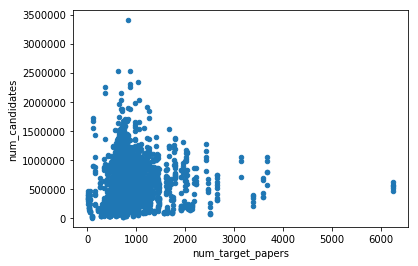

In [37]:
top_results.plot.scatter(x='num_target_papers', y='num_candidates')

(0, 1000000.0)

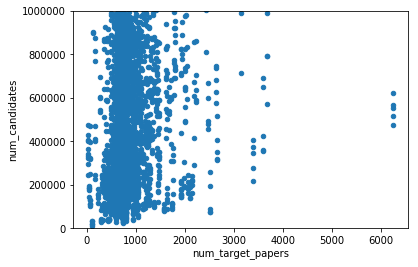

In [38]:
top_results.plot.scatter(x='num_target_papers', y='num_candidates').set_ylim(0,1e6)

In [39]:
top_results.corr()

,review_paper_id,random_seed,num_correctly_predicted,num_target_papers,num_target_in_candidates,num_seed_papers,score_correctly_predicted,num_candidates,time_fit,time_predict,mag_EF,num_entries
review_paper_id,1.000000,0.000707,0.025476,0.028250,0.031453,NaN,-0.006377,0.006372,0.012162,0.010407,-0.031755,-0.019579
random_seed,0.000707,1.000000,0.003428,0.003956,0.004287,NaN,0.004105,-0.007074,-0.009547,-0.010291,0.000471,0.000200
num_correctly_predicted,0.025476,0.003428,1.000000,0.614635,0.637955,NaN,0.524951,-0.023788,0.011538,0.048685,0.069897,-0.079300
num_target_papers,0.028250,0.003956,0.614635,1.000000,0.987458,NaN,-0.188114,0.067361,0.146017,0.176866,0.020142,0.057808
num_target_in_candidates,0.031453,0.004287,0.637955,0.987458,1.000000,NaN,-0.168619,0.087647,0.164141,0.198805,0.011185,0.063638
num_seed_papers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
score_correctly_predicted,-0.006377,0.004105,0.524951,-0.188114,-0.168619,NaN,1.000000,-0.146246,-0.159278,-0.153513,0.097537,-0.171904
num_candidates,0.006372,-0.007074,-0.023788,0.067361,0.087647,NaN,-0.146246,1.000000,0.812632,0.893741,-0.036220,0.010161
time_fit,0.012162,-0.009547,0.011538,0.146017,0.164141,NaN,-0.159278,0.812632,1.000000,0.892391,-0.013057,0.034790
time_predict,0.010407,-0.010291,0.048685,0.176866,0.198805,NaN,-0.153513,0.893741,0.892391,1.000000,-0.026410,0.035729


In [40]:
num_target_not_in_candidate = top_results.num_target_papers - top_results.num_target_in_candidates
num_target_not_in_candidate.value_counts().sort_index()

0       1152
1        739
2        380
3        250
4        182
5        126
6         80
7         67
8         32
9         34
10        16
11        16
12        19
13        14
14        18
15         7
16         6
17         2
18         1
19         7
20         3
21         3
23         3
24         5
25         2
52         4
53         1
60         1
62         1
63         1
        ... 
312        2
313        1
317        1
321        1
330        2
331        3
487        1
490        1
491        1
492        2
501        1
506        2
507        1
511        1
543        1
544        2
549        1
551        1
623        1
628        1
629        1
630        1
632        1
727        4
728        1
1281       1
1283       1
1287       1
1289       1
1292       1
Length: 88, dtype: int64

In [41]:
def get_subj_ext_first(subj_ext):
    if pd.notnull(subj_ext):
        split = subj_ext.split('; ')
        return split[0]
    return None
top_results['subject_extended_first'] = top_results.subject_extended.apply(get_subj_ext_first)

In [42]:
top_results.subject_extended_first.value_counts()

Chemistry                                     1054
Physiology                                     340
Physics                                        279
Biochemistry & Molecular Biology               225
Pharmacology & Pharmacy                        215
Neurosciences & Neurology                      180
Materials Science                              115
Microbiology                                    95
Endocrinology & Metabolism                      65
General & Internal Medicine                     45
Environmental Sciences & Ecology                40
Cardiovascular System & Cardiology              40
Engineering                                     35
Polymer Science                                 30
Thermodynamics                                  30
Behavioral Sciences                             25
Plant Sciences                                  25
Oncology                                        25
Life Sciences & Biomedicine - Other Topics      23
Developmental Biology          

In [43]:
top_results[top_results.subject_extended_first=='Computer Science'][['review_paper_id', 'num_target_papers', 'score_correctly_predicted', 'num_candidates', 'wos_title', 'wos_title_source', 'subject_extended']]

,review_paper_id,num_target_papers,score_correctly_predicted,num_candidates,wos_title,wos_title_source,subject_extended
811,2076063813,873,0.364261,1348977,Deep learning in neural networks: An overview,NEURAL NETWORKS,Computer Science
1181,2076063813,873,0.332188,2312499,Deep learning in neural networks: An overview,NEURAL NETWORKS,Computer Science
1193,2076063813,873,0.331042,2253791,Deep learning in neural networks: An overview,NEURAL NETWORKS,Computer Science
1264,2076063813,873,0.325315,2523591,Deep learning in neural networks: An overview,NEURAL NETWORKS,Computer Science
1265,2076063813,873,0.325315,1880183,Deep learning in neural networks: An overview,NEURAL NETWORKS,Computer Science


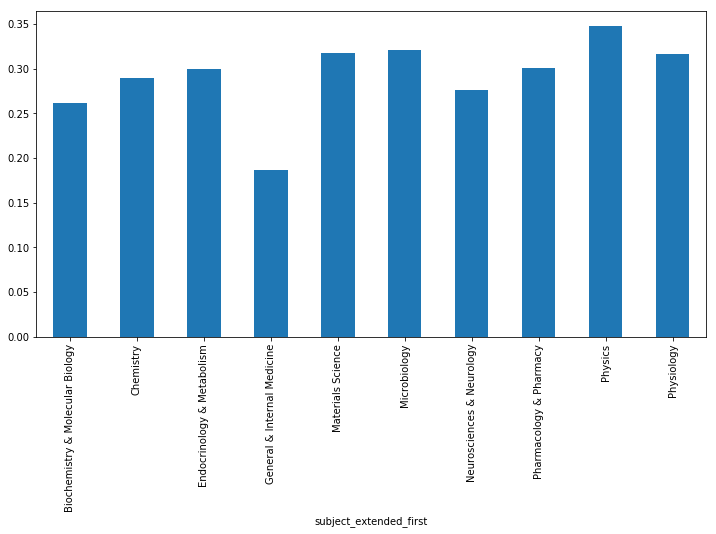

In [44]:
top10 = top_results.subject_extended_first.value_counts()[:10].index
x = top_results[top_results.subject_extended_first.isin(top10)]
gb = x.groupby('subject_extended_first')
plt.figure(figsize=(12,6))
gbmean = gb['score_correctly_predicted'].mean()
gbmean.plot.bar()

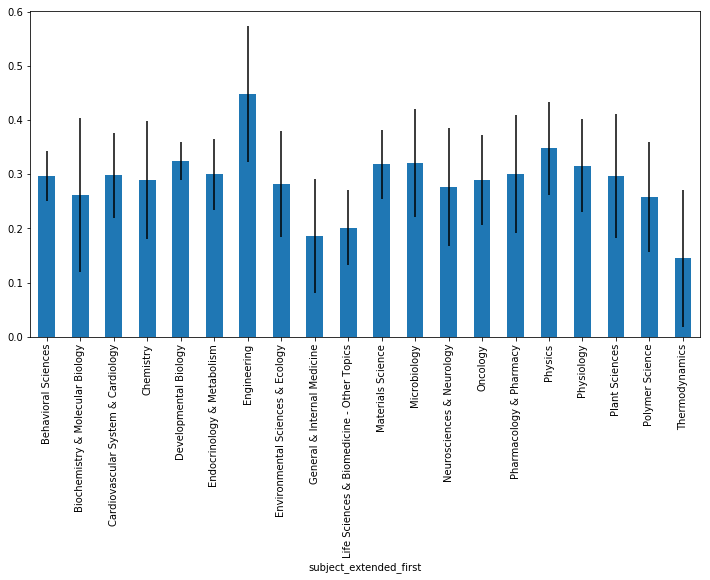

In [45]:
top20 = top_results.subject_extended_first.value_counts()[:20].index
x = top_results[top_results.subject_extended_first.isin(top20)]
gb = x.groupby('subject_extended_first')
plt.figure(figsize=(12,6))
gbmean = gb['score_correctly_predicted'].mean()
gberrs = gb['score_correctly_predicted'].std()
gbmean.plot.bar(yerr=gberrs)

In [46]:
top_results[top_results.num_target_papers>50].score_correctly_predicted.describe()

count    3244.000000
mean        0.295446
std         0.109582
min         0.004098
25%         0.218717
50%         0.296976
75%         0.363473
max         0.759615
Name: score_correctly_predicted, dtype: float64

In [47]:
subject_map = {
    'Chemistry': 'Natural Sciences',
    'Physiology': 'Medicine',
    'Physics': 'Natural Sciences',
    'Biochemistry & Molecular Biology': 'Biology',
    'Pharmacology & Pharmacy': 'Medicine',
    'Neurosciences & Neurology': 'Medicine',
    'Materials Science': 'Engineering',
    'Microbiology': 'Biology',
    'Endocrinology & Metabolism': 'Medicine',
    'General & Internal Medicine': 'Medicine',
    'Cardiovascular System & Cardiology': 'Medicine',
    'Environmental Sciences & Ecology': 'Environmental Sciences',
    'Engineering': 'Engineering',
    'Thermodynamics': 'Engineering',
    'Polymer Science': 'Engineering',
    'Oncology': 'Medicine',
    'Plant Sciences': 'Environmental Sciences',
    'Behavioral Sciences': 'Psychology',
    'Life Sciences & Biomedicine - Other Topics': 'Biology',
    'Developmental Biology': 'Biology',
    'Psychology': 'Psychology'
}

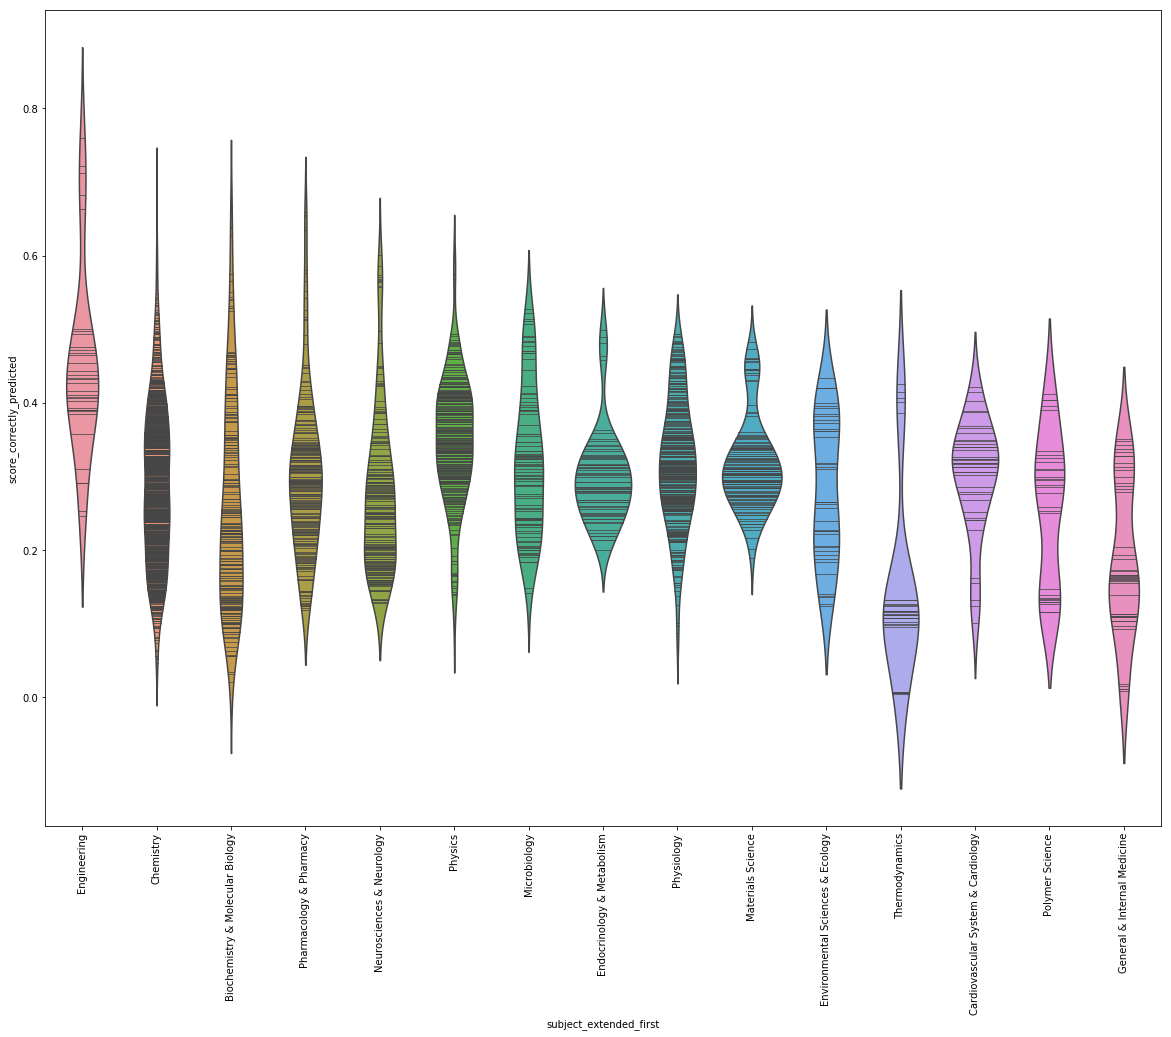

In [48]:
n = 15
topn = top_results.subject_extended_first.value_counts()[:n].index
x = top_results[top_results.subject_extended_first.isin(topn)]
fig, ax = plt.subplots(figsize=(20,15))
sns.violinplot(x=x['subject_extended_first'], y=x['score_correctly_predicted'], inner='stick', ax=ax)
ax.xaxis.set_tick_params(rotation=90)

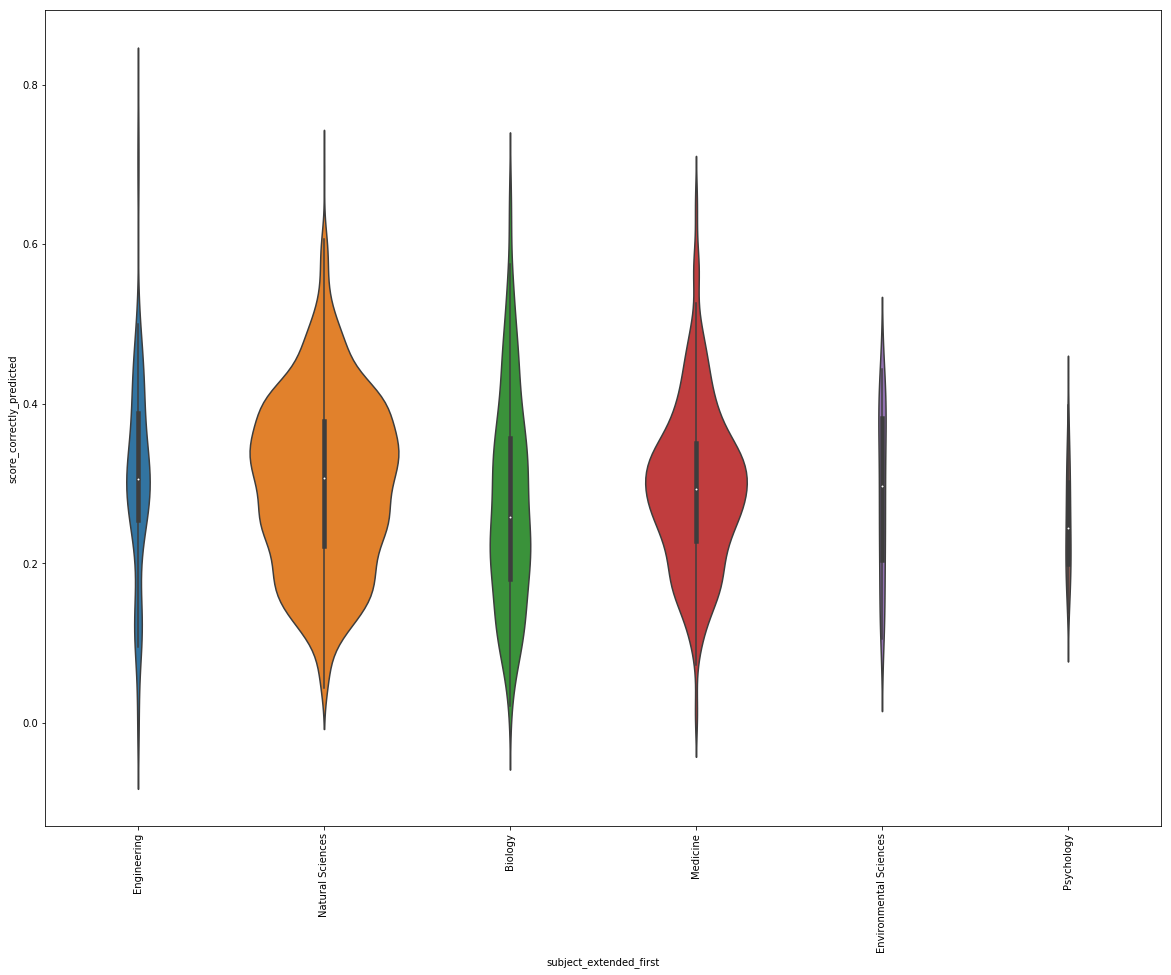

In [49]:
subj_mapped = top_results.subject_extended_first.map(subject_map).dropna()
x = top_results.loc[subj_mapped.index]
fig, ax = plt.subplots(figsize=(20,15))
sns.violinplot(x=subj_mapped, y=top_results['score_correctly_predicted'], scale='count', ax=ax)
ax.xaxis.set_tick_params(rotation=90)

In [56]:
top_results.columns

Index(['datetime_added', 'review_paper_id', 'random_seed', 'datadir',
       'num_correctly_predicted', 'num_target_papers',
       'num_target_in_candidates', 'num_seed_papers',
       'score_correctly_predicted', 'num_candidates', 'features', 'clf',
       'clf_type', 'time_fit', 'time_predict', 'saved_model', 'wos_title',
       'mag_EF', 'doi', 'wos_title_source', 'title_source',
       'title_source_abbrev', 'subject_extended', 'subject_traditional',
       'heading', 'subheading', 'num_entries', 'subject_extended_first'],
      dtype='object')

In [58]:
top_results[top_results.review_paper_id==2298456115]

,datetime_added,review_paper_id,random_seed,datadir,num_correctly_predicted,num_target_papers,num_target_in_candidates,num_seed_papers,score_correctly_predicted,num_candidates,...,doi,wos_title_source,title_source,title_source_abbrev,subject_extended,subject_traditional,heading,subheading,num_entries,subject_extended_first
1584,2018-07-07 02:23:45,2298456115,2,data/review_2298456115/seed_002,198,658,658,50,0.300912,485103,...,10.1021/cr500447k,CHEMICAL REVIEWS,CHEMICAL REVIEWS,CHEM REV,Chemistry,"Chemistry, Multidisciplinary",Science & Technology,Physical Sciences,1.0,Chemistry
1966,2018-07-07 02:30:42,2298456115,3,data/review_2298456115/seed_003,175,658,658,50,0.265957,294522,...,10.1021/cr500447k,CHEMICAL REVIEWS,CHEMICAL REVIEWS,CHEM REV,Chemistry,"Chemistry, Multidisciplinary",Science & Technology,Physical Sciences,1.0,Chemistry
2004,2018-07-07 02:13:19,2298456115,1,data/review_2298456115/seed_001,173,658,657,50,0.262918,327398,...,10.1021/cr500447k,CHEMICAL REVIEWS,CHEMICAL REVIEWS,CHEM REV,Chemistry,"Chemistry, Multidisciplinary",Science & Technology,Physical Sciences,1.0,Chemistry
2006,2018-07-07 02:38:27,2298456115,4,data/review_2298456115/seed_004,173,658,658,50,0.262918,344183,...,10.1021/cr500447k,CHEMICAL REVIEWS,CHEMICAL REVIEWS,CHEM REV,Chemistry,"Chemistry, Multidisciplinary",Science & Technology,Physical Sciences,1.0,Chemistry
2328,2018-07-07 02:45:47,2298456115,5,data/review_2298456115/seed_005,152,658,657,50,0.231003,332191,...,10.1021/cr500447k,CHEMICAL REVIEWS,CHEMICAL REVIEWS,CHEM REV,Chemistry,"Chemistry, Multidisciplinary",Science & Technology,Physical Sciences,1.0,Chemistry
